# Import 

In [1]:
from utils import *
from modules import *

import numpy as np 

from tqdm import tqdm

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Problème Linéaire :

## 1. Problème linéaire dont la frontière de décision va passer par l'origine

In [2]:
# definir un jeu de données lineairement separable 
seed = 42
np.random.seed(seed)

pos_cen = (-3, -3)
pos_sig = [[1, 4], [4, 1]]

neg_cen = (3, 3)
neg_sig = [[1, 5], [4, 1]]

data_train,labels_train = genere_dataset_gaussian(pos_cen,pos_sig,neg_cen,neg_sig,100,-1,1)
labels_train = labels_train.reshape(-1,1)

pos_cen = (-3, -3)
pos_sig = [[2, 2], [3, 2]]

neg_cen = (3, 3)
neg_sig = [[1, 2], [4, 2]]
data_test,labels_test = genere_dataset_gaussian(pos_cen,pos_sig,neg_cen,neg_sig,100,-1,1)
labels_test = labels_test.reshape(-1,1)

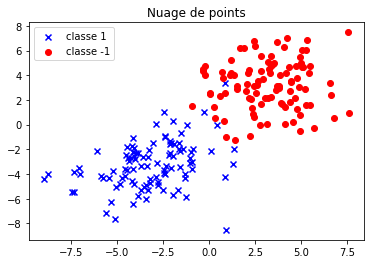

In [3]:
plot2DSet(data_train, labels_train, -1, 1)

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1094.57it/s]


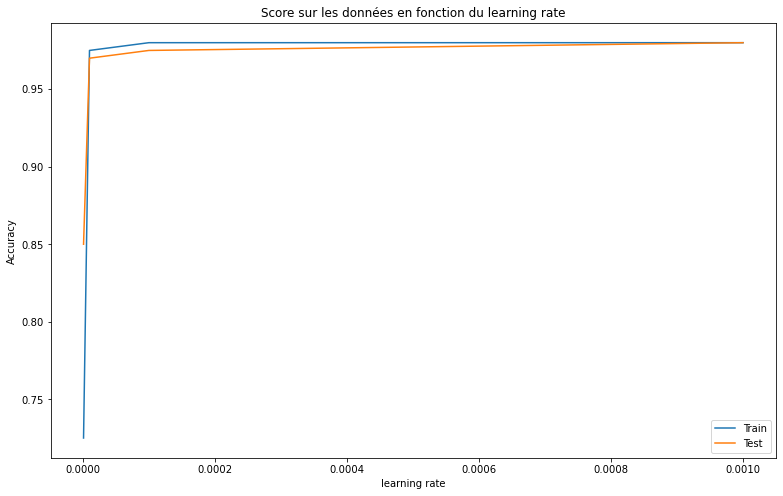

Learning rate optimal  :  0.001


In [4]:
# definir un reseau linaire
facteur_norma = 0.4
plage_biais = (0,1)
np.random.seed(96)

neuro_i = 2
neuro_o = 1
batch_size = 20
epochs = 100
rates = np.array([1e-3,1e-4,1e-5,1e-6])
scores_tr = []
scores_te = []

for eps in rates:

    lineaire = ModuleLineaire(neuro_i,neuro_o,plage_biais,facteur_norma)
    mseloss = MSELoss()
    network_layers = [lineaire]
    network = Sequentiel(network_layers)

    opti = Optim(network,mseloss,eps)
    opti.SGD(data_train,labels_train,batch_size,epochs)
    scores_tr.append(opti.getNetwork().accuracy(data_train,labels_train))
    scores_te.append(opti.getNetwork().accuracy(data_test,labels_test))
    
plt.figure(figsize=(13,8))
plt.title("Score sur les données en fonction du learning rate")
plt.xlabel("learning rate")
plt.ylabel("Accuracy")
plt.plot(rates,scores_tr)
plt.plot(rates,scores_te)
plt.legend(["Train","Test"])
plt.show()

eps_optimal = rates[np.argmax(scores_te)]
print("Learning rate optimal  : ",eps_optimal)

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 977.25it/s]


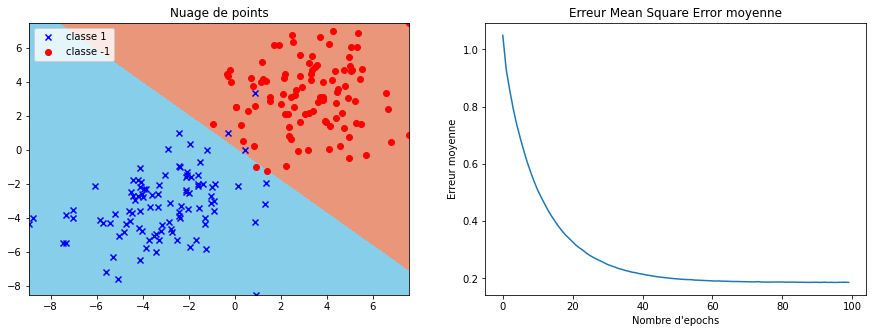

Accuracy  :  0.98


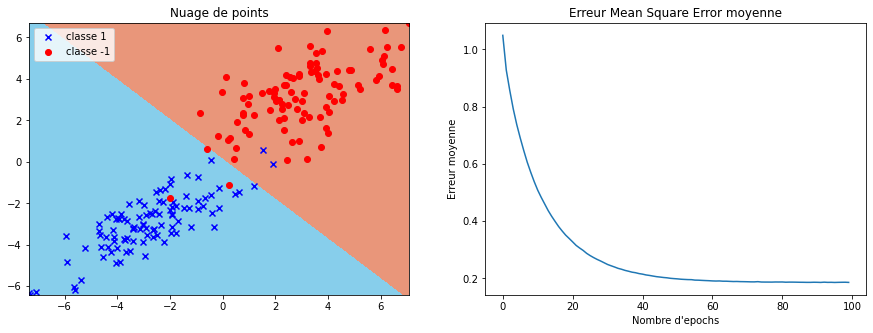

Accuracy  :  0.975


In [5]:
# definir un reseau linaire
facteur_norma = 0.4
plage_biais = (0,1)
neuro_i = 2
neuro_o = 1
batch_size = 20
epochs = 100

lineaire = ModuleLineaire(neuro_i,neuro_o,plage_biais,facteur_norma)
mseloss = MSELoss()
network_layers = [lineaire]
network = Sequentiel(network_layers)

opti = Optim(network,mseloss,1e-4)
opti.SGD(data_train,labels_train,batch_size,epochs)
opti.affichage(data_train,labels_train)

opti.affichage(data_test,labels_test)

## 2. Problème linéaire séparable uniquement avec introduction du biais

In [6]:
# definir un jeu de données lineairement separable 
seed = 42
np.random.seed(seed)
pos_cen = (3, 3)
pos_sig = [[1, 16], [16, 1]]

neg_cen = (13, 13)
neg_sig = [[1, 15], [16, 1]]
data_train,labels_train = genere_dataset_gaussian(pos_cen,pos_sig,neg_cen,neg_sig,100,-1,1)
labels_train = labels_train.reshape(-1,1)


pos_cen = (3, 3)
pos_sig = [[2, 14], [16, 3]]
neg_cen = (13, 13)
neg_sig = [[1, 13], [17, 2]]
data_test,labels_test = genere_dataset_gaussian(pos_cen,pos_sig,neg_cen,neg_sig,100,-1,1)
labels_test = labels_test.reshape(-1,1)

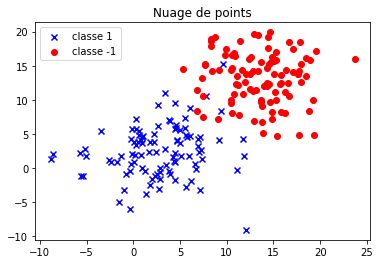

In [7]:
plot2DSet(data_train, labels_train, -1, 1)

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 2348.17it/s]


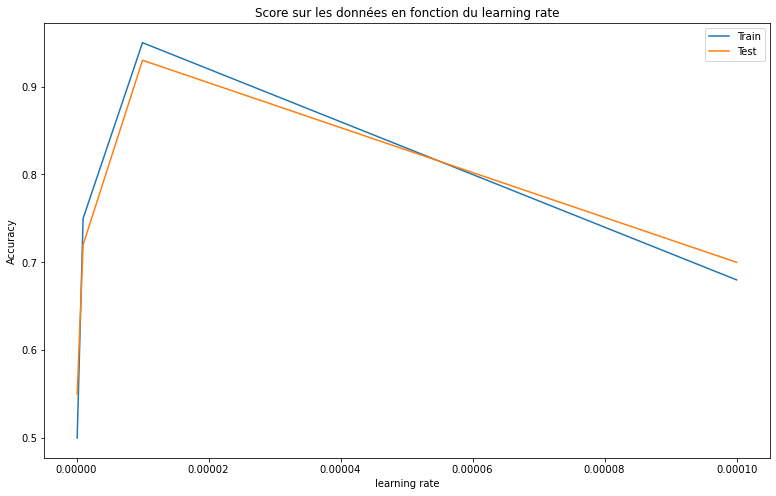

Learning rate optimal  :  1e-05


In [8]:
# definir un reseau linaire
np.random.seed(96)
facteur_norma = 0.4
plage_biais = (0,1)
neuro_i = 2
neuro_o = 1
batch_size = 50
epochs = 100
rates = np.array([1e-4,1e-5,1e-6,1e-7])
scores_tr = []
scores_te = []

for eps in rates:

    lineaire = ModuleLineaire(neuro_i,neuro_o,plage_biais,facteur_norma)
    mseloss = MSELoss()
    network_layers = [lineaire]
    network = Sequentiel(network_layers)

    opti = Optim(network,mseloss,eps)
    opti.SGD(data_train,labels_train,batch_size,epochs)
    scores_tr.append(opti.getNetwork().accuracy(data_train,labels_train))
    scores_te.append(opti.getNetwork().accuracy(data_test,labels_test))

plt.figure(figsize=(13,8))
plt.title("Score sur les données en fonction du learning rate")
plt.xlabel("learning rate")
plt.ylabel("Accuracy")
plt.plot(rates,scores_tr)
plt.plot(rates,scores_te)
plt.legend(["Train","Test"])
plt.show()

eps_optimal = rates[np.argmax(scores_te)]
print("Learning rate optimal  : ",eps_optimal)

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1035.65it/s]


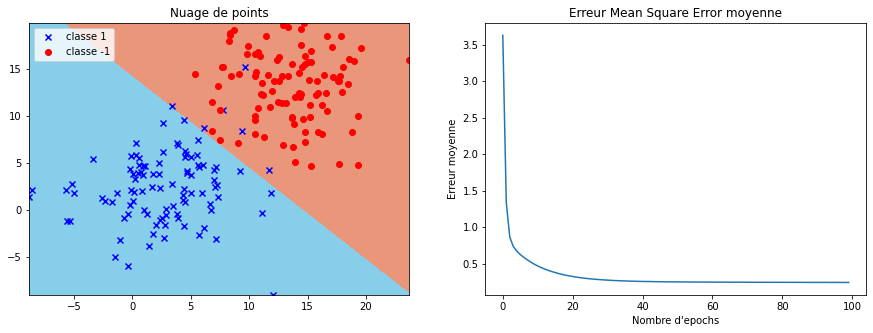

Accuracy  :  0.97


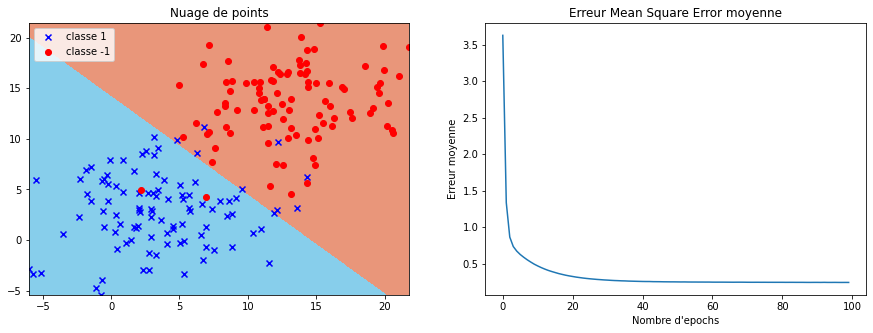

Accuracy  :  0.945


In [9]:
# definir un reseau linaire
facteur_norma = 0.4
plage_biais = (0,1)
neuro_i = 2
neuro_o = 1
batch_size = 20
epochs = 100

lineaire = ModuleLineaire(neuro_i,neuro_o,plage_biais,facteur_norma)
mseloss = MSELoss()
network_layers = [lineaire]
network = Sequentiel(network_layers)

opti = Optim(network,mseloss,eps_optimal)
opti.SGD(data_train,labels_train,batch_size,epochs)
opti.affichage(data_train,labels_train)

opti.affichage(data_test,labels_test)

# Non Lineaire

## 1. Definir un jeu de données de type XOR qui non separable lineairement 

In [10]:
# definir un jeu de données XOR

seed = 42
np.random.seed(seed)
data_xor_train , labels_xor_train = create_XOR(200,0.2)

data_xor_test , labels_xor_test = create_XOR(200,0.3)

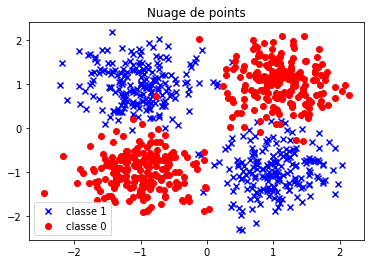

In [11]:
plot2DSet(data_xor_train, labels_xor_train, 0, 1)

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 334.02it/s]


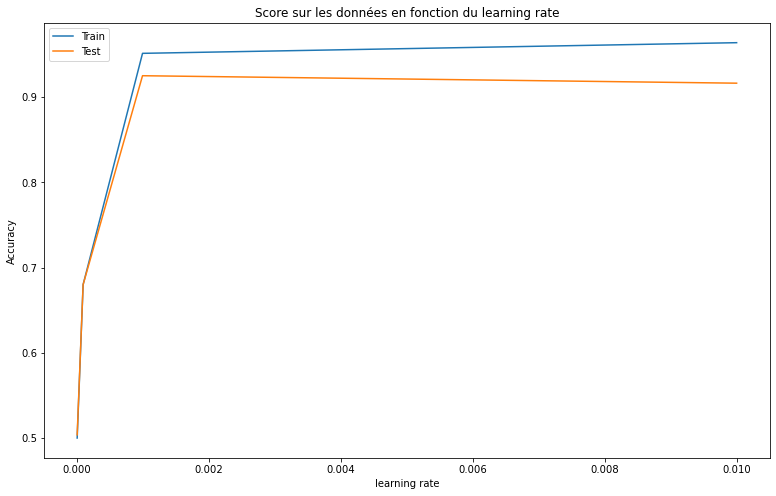

Learning rate optimal  :  0.001


In [12]:
neuro_i_1 = 2
neuro_o_1 = 4
neuro_i_2 = 4
neuro_o_2 = 1

plage_biais = (0,1)
batch_size = 50
epochs = 100
facteur_norma = 0.8

rates = np.array([1e-2,1e-3,1e-4,1e-5])
scores_tr = []
scores_te = []

for eps in rates:
    lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma)
    lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma)
    TanH = ModuleTanH()
    sigmoide = ModuleSigmoide()
    mseloss = MSELoss()


    network_layers = [lineaire_1,TanH,lineaire_2,sigmoide]
    network = Sequentiel(network_layers)


    opti = Optim(network,mseloss,eps)
    opti.SGD(data_xor_train,labels_xor_train,batch_size,epochs)
    scores_tr.append(opti.getNetwork().accuracy(data_xor_train,labels_xor_train))
    scores_te.append(opti.getNetwork().accuracy(data_xor_test,labels_xor_test))

plt.figure(figsize=(13,8))
plt.title("Score sur les données en fonction du learning rate")
plt.xlabel("learning rate")
plt.ylabel("Accuracy")
plt.plot(rates,scores_tr)
plt.plot(rates,scores_te)
plt.legend(["Train","Test"])
plt.show()

eps_optimal = rates[np.argmax(scores_te)]
print("Learning rate optimal  : ",eps_optimal)

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 286.02it/s]


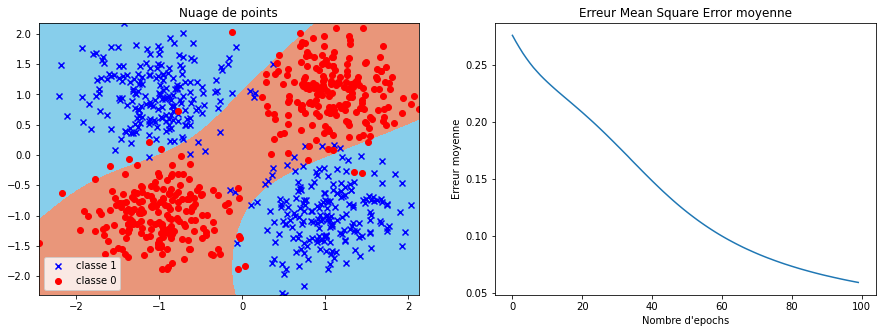

Accuracy  :  0.9525


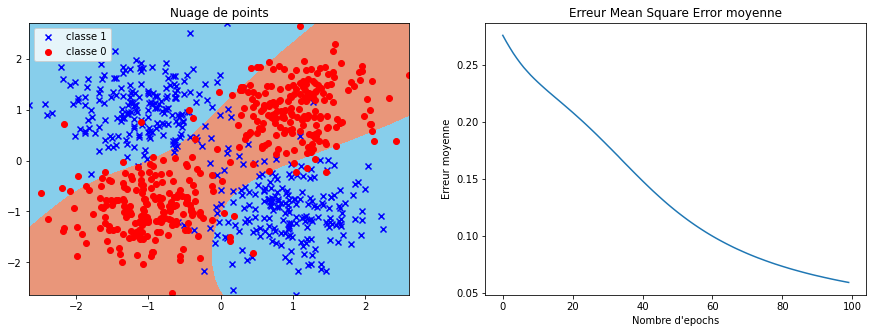

Accuracy  :  0.91625


In [13]:
neuro_i_1 = 2
neuro_o_1 = 4
neuro_i_2 = 4
neuro_o_2 = 1
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 50
epochs = 100


facteur_norma = 0.8
lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma)
lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma)
TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
mseloss = MSELoss()


network_layers = [lineaire_1,TanH,lineaire_2,sigmoide]
network = Sequentiel(network_layers)


opti = Optim(network,mseloss,eps_optimal)
opti.SGD(data_xor_train,labels_xor_train,batch_size,epochs)
opti.affichage(data_xor_train,labels_xor_train)
opti.affichage(data_xor_test,labels_xor_test)

## 2. Definir un jeu de données de type DIRAC qui non separable lineairement 

In [14]:
# definir un jeu de données XOR

seed = 42
np.random.seed(seed)
data_dirac_train , label_dirac_train = create_data_dirac(200,0.1)
data_dirac_test , label_dirac_test = create_data_dirac(200,0.2)

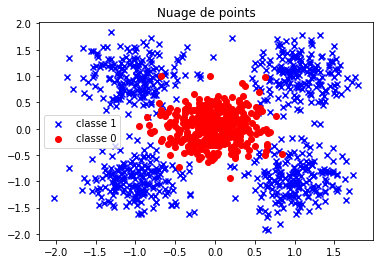

In [15]:
plot2DSet(data_dirac_train, label_dirac_train, 0, 1)

100%|████████████████████████████████████████| 500/500 [00:02<00:00, 236.01it/s]


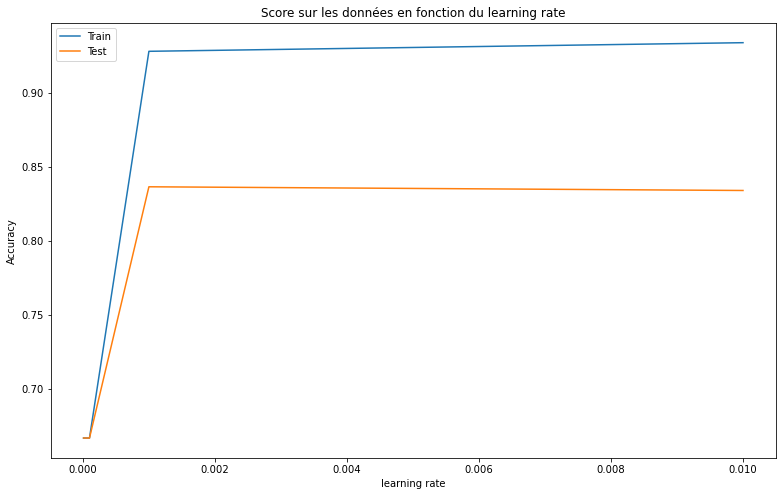

Learning rate optimal  :  0.001


In [25]:
neuro_i_1 = 2
neuro_o_1 = 4
neuro_i_2 = 4
neuro_o_2 = 1

plage_biais = (-1,10)
batch_size = 50
epochs = 500
facteur_norma = 0.8

rates = np.array([1e-2,1e-3,1e-4,1e-5])

scores_tr = []
scores_te = []

for eps in rates:
    lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma)
    lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma)
    TanH = ModuleTanH()
    sigmoide = ModuleSigmoide()
    mseloss = MSELoss()


    network_layers = [lineaire_1,TanH,lineaire_2,sigmoide]
    network = Sequentiel(network_layers)


    opti = Optim(network,mseloss,eps)
    opti.SGD(data_dirac_train,label_dirac_train,batch_size,epochs)
    scores_tr.append(opti.getNetwork().accuracy(data_dirac_train,label_dirac_train))
    scores_te.append(opti.getNetwork().accuracy(data_dirac_test,label_dirac_test))

plt.figure(figsize=(13,8))
plt.title("Score sur les données en fonction du learning rate")
plt.xlabel("learning rate")
plt.ylabel("Accuracy")
plt.plot(rates,scores_tr)
plt.plot(rates,scores_te)
plt.legend(["Train","Test"])
plt.show()

eps_optimal = rates[np.argmax(scores_te)]
print("Learning rate optimal  : ",eps_optimal)

100%|████████████████████████████████████████| 500/500 [00:02<00:00, 249.00it/s]


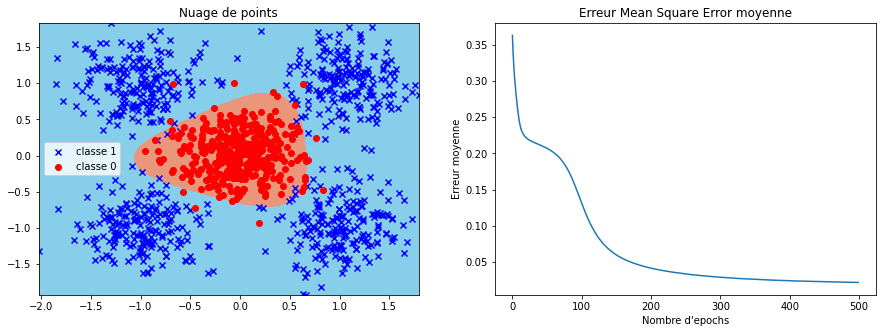

Accuracy  :  0.9791666666666666


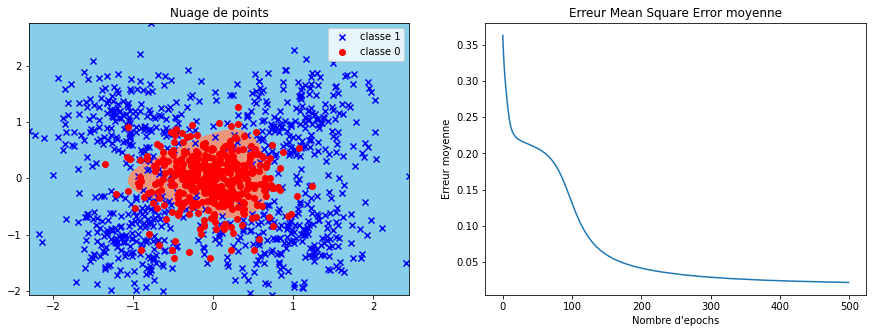

Accuracy  :  0.895


In [26]:
neuro_i_1 = 2
neuro_o_1 = 4
neuro_i_2 = 4
neuro_o_2 = 1
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 50
epochs = 500


facteur_norma = 0.8
lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init='xavier')
lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init='xavier')
TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
mseloss = MSELoss()


network_layers = [lineaire_1,TanH,lineaire_2,sigmoide]
network = Sequentiel(network_layers)


opti = Optim(network,mseloss,eps_optimal)
opti.SGD(data_dirac_train,label_dirac_train,batch_size,epochs)
opti.affichage(data_dirac_train,label_dirac_train)
opti.affichage(data_dirac_test,label_dirac_test)